In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Warm up with an example:

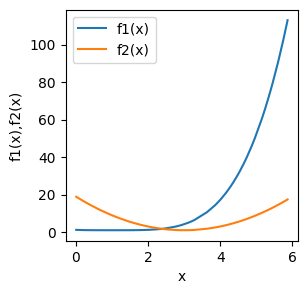

In [2]:
## define objective functions to be minimized

def f1(x):
    return 0.2*(x-1)**4+1

def f2(x):
    return 2*(x-3)**2+1


## generate random points within the domain x in [0,6]

x=np.sort(6*np.random.rand(100))


## plot the objectives
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(x,f1(x),label='f1(x)')
ax.plot(x,f2(x),label='f2(x)')
ax.set_ylabel('f1(x),f2(x)')
ax.set_xlabel('x')
plt.legend()
plt.savefig('example1')
plt.show()



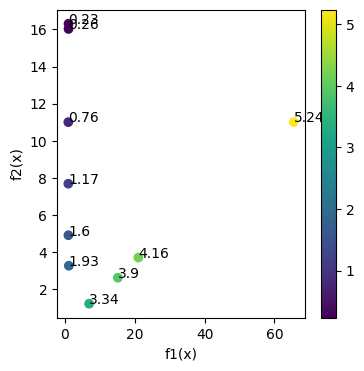

In [3]:
## sample few pojnt candidates (10) to check the dependency 
## between the decision variable and the objectives

x=np.sort(6*np.random.rand(10))

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

plt.scatter(f1(x),f2(x),c=x, cmap='viridis')
plt.ylabel('f2(x)')
plt.xlabel('f1(x)')
plt.colorbar()

for xi in x:
    ## add labels to che the value of x associated
    ## points in the 2D objective space
    ax.text(f1(xi), f2(xi), f'{round(xi,2)}')


plt.show()

### Defnining dominance relation between points 

In [4]:
## this implementation takes as input:
## x1,x2 points in the decision variable space
## fs  list of objectives (callable)
## output: boolean relation dominance 
## (does x1 dominate x2 in the objective space?)
def dominance(x1,x2,fns):
    all_leq_than=True
    one_less_than=False
    for f in fns:
        if f(x1)>f(x2):
            all_leq_than=False
        elif f(x1)<f(x2):
            one_less_than=True
    dominates=all_leq_than*one_less_than
    return dominates

## this implementation takes as input:
## the objectives evaluate at two distinct points (arrays/list)
## vobjs1 = (f1(x1),f2(x1),...,fm(x1))
## output: boolean relation dominance (does vobjs1 dominate vobjs2?)
def dominates(vobjs1,vobjs2):
    vobjs1=np.array(vobjs1)
    vobjs1=np.array(vobjs2)
    return np.all(vobjs1<=vobjs2) and np.any(vobjs1<vobjs2)

Refer to the previous example and try now with some x values

In [7]:
x1=2.8
x2=3.1
fns=[f1,f2]

if dominance(x1,x2,fns):
    print(f'x1 = {x1} dominates x2 = {x2}: \n\n[f1(x1),f2(x1)]=[{(round(f1(x1),2),round(f2(x1),2))}] \n\n[f1(x2),f2(x2)]=[{(round(f1(x2),2),round(f2(x2),2))}]')
elif dominance(x2,x1,fns):
    print(f'x1 = {x1} is dominated by x2 = {x2}:  \n[f1(x1),f2(x1)]=[{(round(f1(x1),2),round(f2(x1),2))}] \n\n[f1(x2),f2(x2)]=[{(round(f1(x2),2),round(f2(x2),2))}]')
else:
    print(f'there is no clear dominance between x1 and x2:  \n[f1(x1),f2(x1)]=[{(round(f1(x1),2),round(f2(x1),2))}] \n\n[f1(x2),f2(x2)]=[{(round(f1(x2),2),round(f2(x2),2))}]')

there is no clear dominance between x1 and x2:  
[f1(x1),f2(x1)]=[(3.1, 1.08)] 

[f1(x2),f2(x2)]=[(4.89, 1.02)]


## Scalarization 

In [12]:
## We define a funtion returning the scalarization of the objectives
## input = list of objectives (fs), list of weights (ws)
## output = w1 f1 + w2 f2+ ...  callable

def generate_scalar_linear_obj(fs:list,ws:list):
    def scalar_obj(x):
        return np.sum([w*f(x) for w,f in zip(ws,fs)],axis=0)
    return scalar_obj

Now try with the preivious example.

Remember that weights need to be normalized $(\sum_i w_i =1)$ and should be positive definite 

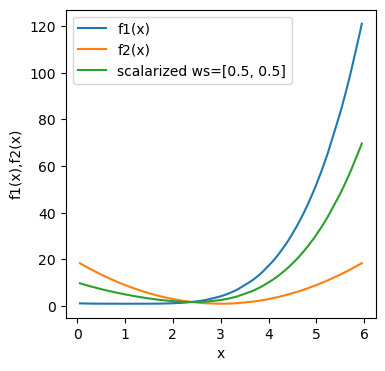

In [13]:
## Define points within the domain   x in [0,6]
x=np.sort(6*np.random.rand(100, 1),0)

## Define weights and ensure normalization
ws=[0.5,0.5]
ws=[w/sum(ws) for w in ws]

assert all([w>0 for w in ws])

## Define the scalar weighted objective
scalarized_obj=generate_scalar_linear_obj([f1,f2],ws) 


fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x,f1(x),label='f1(x)')
ax.plot(x,f2(x),label='f2(x)')
ax.plot(x,scalarized_obj(x),label=f'scalarized ws={ws}')
ax.set_ylabel('f1(x),f2(x)')
ax.set_xlabel('x')
plt.legend()
plt.show()

### Find the set of PO points

In [14]:
from scipy.optimize import minimize


# define set of possible weight combination (be sure to sample enough)
ws_list=[]
for w0 in np.linspace(0,1,1001):
    ws_list.append([w0,1.-w0])
    
#initialize the set of optimal solutions
optimal_x=[]
for ws in ws_list:
    # find the optimal solution associated to a specific weight combination
    scalarized_obj=generate_scalar_linear_obj([f1,f2],ws) 
    res=minimize(scalarized_obj, x0=0.4 ,method='BFGS')
    optimal_x+=res.x.tolist()
optimal_x=np.array(optimal_x)



Let us compare the image of the x domain in the objective space is with the set of optimal solutions. 

We begin by plotting the image of the x domain

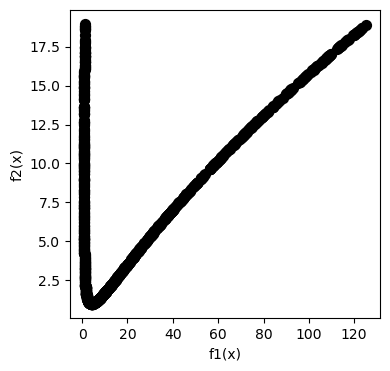

In [15]:
x=np.sort(6*np.random.rand(1000, 1),0)
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(f1(x),f2(x),color='k',s=50)
ax.set_ylabel('f2(x)')
ax.set_xlabel('f1(x)')
plt.show()

And then compare them with the Pareto optimal solutions

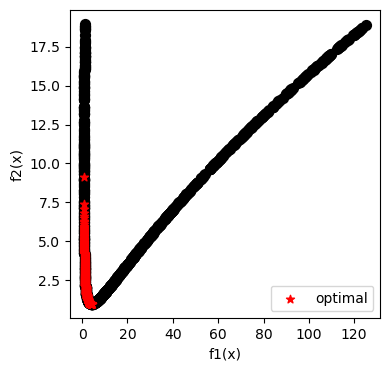

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(f1(x),f2(x),color='k',s=50)
ax.scatter(f1(optimal_x),f2(optimal_x),color='red',marker='*',label='optimal')
ax.set_ylabel('f2(x)')
ax.set_xlabel('f1(x)')
plt.legend()
plt.show()